In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_v1.4_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
bundleList = []
sql = 'filter="r"'
metric = metrics.CountMetric('filter')
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.SumMetric()]
plotDict = {'colorMax': 27.4}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

# Comment out the usual plotAll
#bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'filter', 'fieldRA']
Found 474955 visits
Running:  ['opsim_Count_filter_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


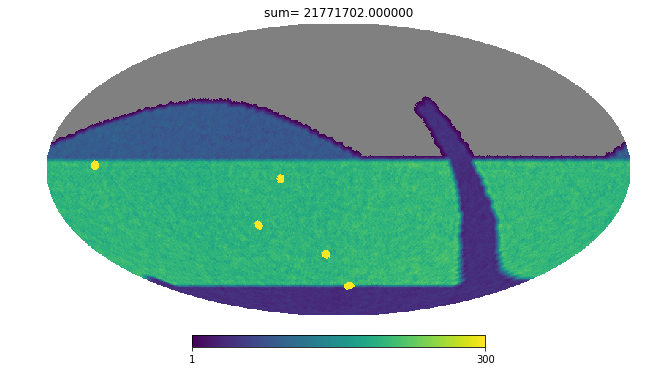

In [5]:
#Now just make the plot manually 
hp.mollview(bundleList[0].metricValues,  max=300, title='sum= %f' % bundleList[0].summaryValues['Sum'])